# Machine Learning and Statistics for Physicists

## Homework 4

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
import scipy.stats

### Problem 1

Implement the function below to calculate the event probabilities $P(A)$, $P(B)$, $P(A \cap B)$ and the conditional probabilities $P(A\mid B)$, $P(B\mid A)$ for an arbitrary (finite) probability space specified by each outcome's probability. *Hint: the probability of an event containing a set of outcomes is just the sum of the individual outcome probabilities.*

In [3]:
def calculate_probabilities(p, A, B):
    """Calculate probabilities for an arbitrary probability space.
    
    Parameters
    ----------
    p : float array of shape (N,)
        Probabilities for each of the N possible outcomes in the probability space.
    A : boolean array of shape (N,)
        Identifies members of event set A in the probability space.
    B : boolean array of shape (N,)
        Identifies members of event set B in the probability space.
        
    Returns
    -------
    tuple
        Tuple of five probabilities values:
        P(A), P(B), P(A intersect B), P(A | B), P(B | A).
    """
    assert np.all((p >= 0) & (p <= 1))
    assert np.sum(p) == 1
    # YOUR CODE HERE

    pA = sum(p*A)
    pB = sum(p*B)
    pAB = sum(p*A*B)
    pAgB = pAB/pB
    pBgA = pAB/pA
    
    return pA, pB, pAB, pAgB, pBgA

In [4]:
# A correction solution should pass the tests below.
gen = np.random.RandomState(seed=123)
N = 100
p = gen.uniform(size=(4, N))
p = (p / p.sum(axis=1).reshape(-1, 1)).reshape(-1) / 4.

# Test when A and B are "independent" events, i.e., P(A interset B) = P(A) P(B).
A = np.arange(4 * N) < 2 * N
B = (np.arange(4 * N) >= N) & (np.arange(4 * N) < 3 * N)
assert np.allclose(
    np.round(calculate_probabilities(p, A, B), 3),
    [0.5, 0.5, 0.25, 0.5, 0.5])

# Test with randomly generated events A, B.
A = gen.uniform(size=4*N) < 0.3
B = gen.uniform(size=4*N) > 0.6
#print(np.round(event_probabilities(p, A, B), 3))
assert np.allclose(
    np.round(calculate_probabilities(p, A, B), 3),
    [0.278, 0.33, 0.076, 0.23, 0.273])

### Problem 2

The cumulative distribution function (CDF) is the fundamental representation of a random variable, rather than the probability density function (PDF) which might not be defined, is not a probability and generally has dimensions. In this problem, you will explore a practical application of the CDF for generating random numbers.

Since the CDF $y = F_X(x)$ maps from random variable values to the range $[0,1]$, its inverse $x = F_X^{-1}(y)$ maps from $[0,1]$ back to the random variable. What distribution of $y$ values would generate values according to the PDF $f_X(x)$ when transformed by the inverse $F_X^{-1}(y)$? The answer is a uniform distribution, as we can demonstrate numerically for an arbitrary random variable:

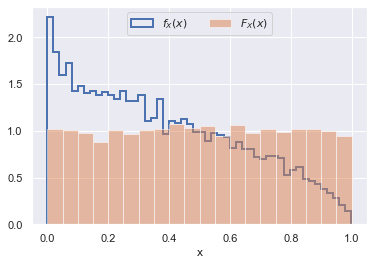

In [5]:
def cdf_hist(X, n=10000, seed=123):
    gen = np.random.RandomState(seed=seed)
    # Generate n random value from the scipy.stats distribution X.
    x = X.rvs(n, random_state=gen)
    plt.hist(x, bins=50, label='$f_X(x)$', histtype='step', lw=2, density=True)
    # Histogram the corresponding CDF values.
    y = X.cdf(x)
    plt.hist(y, bins=20, label='$F_X(x)$', alpha=0.5, density=True)
    plt.xlabel('x')
    plt.legend(loc='upper center', ncol=2)
    
cdf_hist(scipy.stats.beta(0.9, 1.5))

When the function $F_X(x)$ can be inverted analytically, you can use it to transform uniformly generated random values into a random sampling of the PDF $f_X(x)$.

For example, consider random outcomes consisting of $(x,y)$ points uniformly distributed on the disk,
$$
0 \le r_1 \le \sqrt{x^2 + y^2} \le r_2 \; .
$$
The CDF of the random variable $r \equiv \sqrt{x^2 + y^2}$ is then
$$
F_R(r) = \begin{cases}
1 & r > r_2 \\
\frac{r^2 - r_1^2}{r_2^2 - r_1^2} & r_1 \le r \le r_2 \\
0 & r < r_1
\end{cases}\; .
$$
Implement the function below to apply $F_R^{-1}(y)$ to uniformly distributed random values in order to sample $f_R(x)$:

In [6]:
def sample_disk(r1, r2, n, gen):
    """Sample random radii for points uniformly distributed on a disk.
    
    Parameters
    ----------
    r1 : float
        Inner radius of disk.
    r2 : float
        Outer radius of disk.
    n : int
        Number of random samples to generate.
    gen : np.random.RandomState
        Random state for reproducible random numbers.
        Uses gen.uniform() internally, not gen.rand().
        
    Returns
    -------
    array
        Array of n randomly generated r values.
    """
    assert (r1 >= 0) and (r1 < r2)
    # YOUR CODE HERE
    
    randoms = gen.uniform(0.0, 1.0, size = n)
    rs = np.sqrt(randoms*(r2**2 - r1**2) + r1**2)
    
    return rs

In [7]:
# A correct solution should pass these tests.
r1, r2, n = 1., 2., 1000
gen = np.random.RandomState(seed=123)
r = sample_disk(r1, r2, n, gen)
assert np.all((r >= r1) & (r <= r2))
assert np.allclose(np.round(np.mean(r), 3), 1.556)
assert np.allclose(np.round(np.std(r), 3), 0.279)

r1, r2, n = 0., 2., 1000
r = sample_disk(r1, r2, n, gen)
assert np.all((r >= r1) & (r <= r2))
assert np.allclose(np.round(np.mean(r), 3), 1.325)
assert np.allclose(np.round(np.std(r), 3), 0.494)

Test your implementation by plotting some $(x,y)$ points with uniformly random $0 \le \theta < 2\pi$:

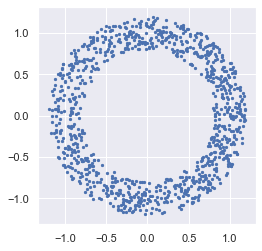

In [8]:
gen = np.random.RandomState(seed=123)
r = sample_disk(0.8, 1.2, 1000, gen)
theta = gen.uniform(0, 2 * np.pi, size=len(r))
plt.scatter(r * np.cos(theta), r * np.sin(theta), s=5)
plt.gca().set_aspect(1)

Sometimes $F_X(x)$ cannot be inverted explicitly, either because the inverse has no closed form or because the underlying distribution is arbitrary.  In these cases, we can still apply the same method numerically.

Implement the function below to tabulate an empirical estimate of the CDF for an arbitrary random variable, as:
$$
x_{CDF} = x_{\text{lo}}, x_0, x_1, \ldots, x_{N-1}, x_{\text{hi}} \; ,
$$
where the $x_i$ are [sorted](https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html), $x_0 \le x_1 \le \ldots \le x_{N-1}$, and have corresponding CDF values:
$$
y_{CDF} = 0, \frac{1}{N+1}, \frac{2}{N+1}, \ldots, \frac{N}{N+1}, 1 \; .
$$

In [9]:
def empirical_cdf(x, xlo, xhi):
    """Tabulate the empirical CDF from samples of an arbitrary random variable.
    
    Parameters
    ----------
    x : array of shape (N,)
        Array of input random variable values to use.
    xlo : float
        Low limit for the random variable x.
    xhi : float
        High limit for the random variable x.
        
    Returns
    -------
    tuple
        Tuple (x_cdf, y_cdf) of arrays both of shape (N+2,), padded at each end
        as described above.
    """
    assert xlo < xhi
    x = np.asarray(x)
    assert np.all((x >= xlo) & (x <= xhi))
    # YOUR CODE HERE
    
    N = len(x)
    
    xsorted = np.sort(x)
    y = np.zeros(N)
    for i in range(N):
        y[i] = (i+1)/(N+1)
        
    ycdf = np.concatenate(([0.0],y,[1.0]))
    xcdf = np.concatenate(([xlo],xsorted,[xhi]))
    
    return xcdf, ycdf

In [10]:
# A correct solution should pass these tests.
x_cdf, y_cdf = empirical_cdf([1, 2, 3, 4], 0, 5)
assert np.array_equal(x_cdf, [0, 1, 2, 3, 4, 5])
assert np.allclose(y_cdf, [0., .2, .4, .6, .8, 1.])

x_cdf, y_cdf = empirical_cdf([4, 2, 1, 3], 0, 5)
assert np.array_equal(x_cdf, [0, 1, 2, 3, 4, 5])
assert np.allclose(y_cdf, [0., .2, .4, .6, .8, 1.])

gen = np.random.RandomState(seed=123)
x = scipy.stats.beta(0.9, 1.5).rvs(size=4, random_state=gen)
x_cdf, y_cdf = empirical_cdf(x, 0., 1.)
assert np.allclose(
    np.round(x_cdf, 3),
    [ 0.   ,  0.087,  0.152,  0.42 ,  0.721,  1.   ])
assert np.allclose(y_cdf, [0., .2, .4, .6, .8, 1.])

Test your implementation by generating CDF samples matched to an unknown distribution.  Note that we use [linear interpolation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html) to numerically invert the empirical CDF in this approach, which is a useful trick to remember:

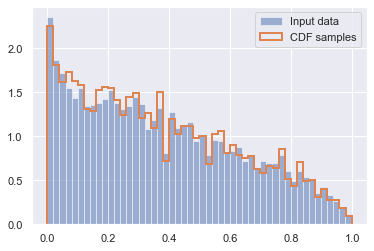

In [11]:
n = 5000
gen = np.random.RandomState(seed=123)
X = scipy.stats.beta(0.9, 1.5)
# Generate samples using scipy.stats
x_in = X.rvs(n, random_state=gen)
plt.hist(x_in, bins=50, label='Input data', alpha=0.5, density=True)
# Generate samples using the empirical CDF of x_in
x_cdf, y_cdf = empirical_cdf(x_in, 0., 1.)
y = gen.uniform(size=n)
x = np.interp(y, y_cdf, x_cdf)
plt.hist(x, bins=50, label='CDF samples', histtype='step', lw=2, density=True)
plt.legend();

### Problem 3

We showed that the conditional probability density of a multidimensional feature space can be calculated as:
$$
f_{X|Y}(\vec{x}\mid \vec{y}) = \frac{f(\vec{x}, \vec{y})}{f(\vec{y})} \; ,
$$
where features $\vec{x}$ are conditioned on the values of features $\vec{y}$.

For the ubiquitous multivariate normal probability density, we can split the joint mean $\vec{\mu}_{X,Y}$ into separate means for the $X$ and $Y$ features,
$$
\vec{\mu}_{X,Y} = \begin{bmatrix}\vec{\mu}_X \\ \vec{\mu}_Y\end{bmatrix}
$$
and, similarly, for the joint covariance:
$$
C_{X,Y} = \begin{bmatrix}
C_{XX} & C_{XY} \\
C_{XY} & C_{YY}
\end{bmatrix} \; ,
$$
where $C_{XX}$ is the submatrix of covariances for the $X$ features, etc.

We can then explicitly calculate the resulting marginal mean:
$$
\vec{\mu}_{X|Y} \equiv \langle \vec{x}\rangle_{X|Y} = \vec{\mu}_X + C_{XY} C_{YY}^{-1} \left(\vec{y} - \vec{\mu}_Y\right) \; ,
$$
and covariance
$$
C_{X|Y} \equiv \langle \left( \vec{x} - \vec{\mu}_{X|Y}\right)
\left( \vec{x} - \vec{\mu}_{X|Y}\right)^T \rangle_{X|Y} = C_{XX} - C_{XY} C_{YY}^{-1} C_{XY}^T \; .
$$

Note that $\vec{\mu}_{X|Y}$ depends on the conditioned feature values $\vec{y}$, but $C_{X|Y}$ does not. These Gaussian conditional probability densities are central to the Factor Analysis (FA) and Gaussian Process (GP) methods.

Implement the function below to calculate these expressions:

In [12]:
def gauss_conditional_predicted(y0, muX, muY, CXX, CXY, CYY):
    """Predicted conditional Gaussian means and covariances.
    
    Parameters
    ----------
    y0 : array of shape (ny,)
        Fixed y values used for conditioning.
    muX : array of shape (nx,)
        Mean value of X features.
    muY : array of shape (ny,)
        Mean value of Y features.
    CXX : array of shape (nx, nx)
        Covariances between X features.
    CXY : array of shape (nx, ny)
        Covariances between X and Y features.
    CYY : array of shape (ny, ny)
        Covariances between Y features.
        
    Returns
    -------
    tuple
        Tuple (mu, C) of arrays with shapes (nx,) and (nx,nx), respectively,
        giving the means and covariances of X features conditioned on Y=y0.
    """
    nx = len(muX)
    ny = len(muY)
    assert y0.shape == (ny,)
    assert CXX.shape == (nx, nx)
    assert CXY.shape == (nx, ny)
    assert CYY.shape == (ny, ny)
    # YOUR CODE HERE
    
    CYYinv = np.linalg.inv(CYY)
    CXYT = CXY.T
    diffy = y0 - muY
    CXYCYYinv = np.matmul(CXY,CYYinv)
    
    muXgY = muX + np.matmul(CXYCYYinv,diffy)
    CXgY = CXX - np.matmul(CXYCYYinv,CXYT)
    
    return muXgY, CXgY

In [13]:
# A correct solution should pass these tests.
nx, ny = 2, 3
y0, muX, muY = np.ones(ny), np.zeros(nx), np.zeros(ny)
CXX, CXY, CYY = np.identity(nx), np.zeros((nx, ny)), np.identity(ny)
mu, C = gauss_conditional_predicted(y0, muX, muY, CXX, CXY, CYY)
assert np.allclose(mu, [0, 0])
assert np.allclose(C, [[1, 0], [0, 1]])

y0, muX, muY = np.array([1, 2]), np.array([3, 2, 1]), np.array([0, 0])
CXX, CXY, CYY = np.array([[2, 0, 1], [0, 1, 0], [1, 0, 1]]), np.zeros((3, 2)), np.array([[1, 1], [1, 2]])
mu, C = gauss_conditional_predicted(y0, muX, muY, CXX, CXY, CYY)
assert np.allclose(mu, [3, 2, 1])
assert np.allclose(C, [[ 2, 0, 1],  [0, 1, 0], [1, 0, 1]])

Implement the function below to calculate empirical estimates of the conditional Gaussian means and covariances. Since the requirement $Y = y_0$ will likely not select *any* samples from a finite dataset, we relax this condition to:
$$
\left| \vec{y} - \vec{y}_0\right|^2 < \epsilon^2 \; ,
$$
and apply `np.mean` and `np.cov` to the resulting subset of samples. *Hint: pay attention to the `rowvar` parameter of `np.cov`.*

In [14]:
def gauss_conditional_measured(X, Y, y0, eps=1.5):
    """Measured conditional Gaussian means and covariances.
    
    Parameters
    ----------
    X : array of shape (N, nx)
        X feature values for dataset with N samples.
    Y : array of shape (N, ny)
        Y feature values for dataset with N samples.
    y0 : array of shape (ny,)
        Fixed y values used for conditioning.
    eps : float
        Tolerance for selecting samples with Y ~ y0.
        
    Returns
    -------
    tuple
        Tuple (mu, C) of arrays with shapes (nx,) and (nx,nx), respectively,
        giving the means and covariances of X features conditioned on Y=y0.
    """
    # YOUR CODE HERE
    
    xlist = []
    ylist = []
    
    N, ny = Y.shape
    eps2 = eps**2
    for i in range(N):
        dy = Y[i] - y0
        dy2 = np.inner(dy,dy)
        if dy2 < eps2:
            xlist.append(X[i])
            ylist.append(Y[i])
    
    Xsamp = np.array(xlist)
    Ysamp = np.array(ylist)
    
    muX = np.mean(Xsamp,axis=0)
    
    CX = np.cov(Xsamp, rowvar=False)
    
    return muX, CX

In [15]:
# A correct solution should pass these tests.
# Repeat the first test above, but numerically this time.
gen = np.random.RandomState(seed=123)
nx, ny = 2, 3
y, muX, muY = np.ones(ny), np.zeros(nx), np.zeros(ny)
CXX, CXY, CYY = np.identity(nx), np.zeros((nx, ny)), np.identity(ny)
mu = np.hstack([muX, muY])
C = np.block([[CXX, CXY], [CXY.T, CYY]])
XY = gen.multivariate_normal(mu, C, size=1000000)
mu, C = gauss_conditional_measured(XY[:, :nx], XY[:, nx:], y)
assert np.allclose(np.round(mu, 2), [0, 0])
assert np.allclose(np.round(C, 2), [[1, 0], [0, 1]])

# Repeat the second test above, but numerically this time.
y, muX, muY = np.array([1, 2]), np.array([3, 2, 1]), np.array([0, 0])
CXX, CXY, CYY = np.array([[2, 0, 1], [0, 1, 0], [1, 0, 1]]), np.zeros((3, 2)), np.array([[1, 1], [1, 2]])
mu = np.hstack([muX, muY])
C = np.block([[CXX, CXY], [CXY.T, CYY]])
XY = gen.multivariate_normal(mu, C, size=1000000)
mu, C = gauss_conditional_measured(XY[:, :3], XY[:, 3:], y)
assert np.allclose(np.round(mu, 2), [3, 2, 1])
assert np.allclose(np.round(C, 2), [[ 2, 0, 1],  [0, 1, 0], [1, 0, 1]])